<a href="https://colab.research.google.com/github/mehadisaki/Sales-Forecasting-model-development-/blob/main/Sales_Forecasting_model_development_ARIMA%C2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 33.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#! pip install statsmodel

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
import itertools
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.arima.utils import ndiffs 
from pmdarima import arima
import time

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse, mse
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima 
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults


from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/My Drive/TS - forcast project/image'


Mounted at /content/gdrive


In [5]:
# ! pip install stldecompose

In [6]:
#! pip install --upgrade Cython
#! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [7]:
url = 'https://github.com/mehadisaki/Sales-Forecasting-model-development-/blob/main/TV%20Delivery_2016-2022.xlsx?raw=true'
# taking link from view raw'

## indexing with datetime
df =pd.read_excel(url,index_col='Month',parse_dates=['Month'])
df.sort_index(inplace = True)

In [8]:
 df.head()

,SIZE,Year,Delivery
Month,,,
2016-01-01,"28"" ( 711 mm )",2016,2296
2016-01-01,"32"" ( 813 mm )",2016,4513
2016-01-01,"43"" ( 1.09 m )",2016,436
2016-01-01,"24"" ( 610 mm )",2016,7236
2016-01-01,"55"" ( 1.397 m )",2016,147


In [9]:
df.dtypes

SIZE        object
Year         int64
Delivery     int64
dtype: object

In [10]:
# select 32" TV
df32 = df.loc[df["SIZE"] == "32\" ( 813 mm )"]

In [11]:
df32.tail()

,SIZE,Year,Delivery
Month,,,
2021-11-01,"32"" ( 813 mm )",2021,18689
2021-12-01,"32"" ( 813 mm )",2021,15909
2022-01-01,"32"" ( 813 mm )",2022,22520
2022-02-01,"32"" ( 813 mm )",2022,26059
2022-03-01,"32"" ( 813 mm )",2022,24387


In [12]:
## data type
type(df32)

pandas.core.frame.DataFrame

In [13]:
df32.isnull().sum()

SIZE        0
Year        0
Delivery    0
dtype: int64

In [14]:
df32.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
      

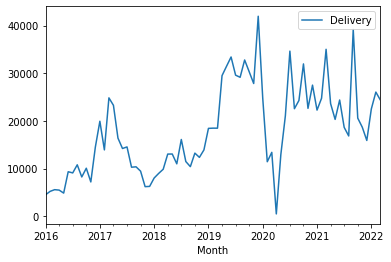

In [15]:
# plot the time series
df32.plot( y= "Delivery")
plt.show()

In [16]:
df32.dtypes


SIZE        object
Year         int64
Delivery     int64
dtype: object

In [17]:
# Extracting just Month and Year separately from Pandas Datetime column and indexing by them
df_r =pd.read_excel(url)
df_r.sort_index(inplace = True)
df_r['year'] = pd.DatetimeIndex(df_r['Month']).year
#df_r['month'] = pd.DatetimeIndex(df_r['Month']).month

In [18]:
df_r.head()

,SIZE,Year,Month,Delivery,year
0,"32"" ( 813 mm )",2022,2022-01-01,22520,2022
1,"43"" ( 1.09 m )",2022,2022-01-01,4906,2022
2,"28"" ( 711 mm )",2022,2022-01-01,5,2022
3,"39"" ( 991 mm )",2022,2022-01-01,1,2022
4,"20"" ( 508 mm)",2022,2022-01-01,4,2022


In [19]:
df_r['YearMonth'] = df_r['Month'].map(lambda x: 100*x.year + x.month)

In [20]:
df_r.head()

,SIZE,Year,Month,Delivery,year,YearMonth
0,"32"" ( 813 mm )",2022,2022-01-01,22520,2022,202201
1,"43"" ( 1.09 m )",2022,2022-01-01,4906,2022,202201
2,"28"" ( 711 mm )",2022,2022-01-01,5,2022,202201
3,"39"" ( 991 mm )",2022,2022-01-01,1,2022,202201
4,"20"" ( 508 mm)",2022,2022-01-01,4,2022,202201


In [21]:
df_r.dtypes

SIZE                 object
Year                  int64
Month        datetime64[ns]
Delivery              int64
year                  int64
YearMonth             int64
dtype: object

In [22]:
df_r.index

RangeIndex(start=0, stop=632, step=1)

In [23]:
#. selecting delivery and time data fro dataframe
data= df_r[['Month', 'Delivery']].loc[df_r["SIZE"] == "32\" ( 813 mm )"]

In [24]:
data.columns =['ds','y']

In [25]:
data.head()

,ds,y
0,2022-01-01,22520
10,2022-02-01,26059
16,2022-03-01,24387
22,2021-01-01,22280
30,2021-02-01,24766


In [26]:
data.describe()

,y
count,75.000000
mean,17986.853333
std,9301.959356
min,496.000000
25%,10397.000000
50%,16399.000000
75%,24392.000000
max,41972.000000


In [27]:
data.index

Int64Index([  0,  10,  16,  22,  30,  38,  46,  54,  62,  70,  76,  83,  91,
             97, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
            195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 276,
            313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 432, 433,
            434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 550, 551, 552,
            553, 554, 555, 556, 557, 558, 559, 560, 561, 627],
           dtype='int64')

##Ploting

Ploting data without datetime indexing

<Figure size 3000x2500 with 0 Axes>

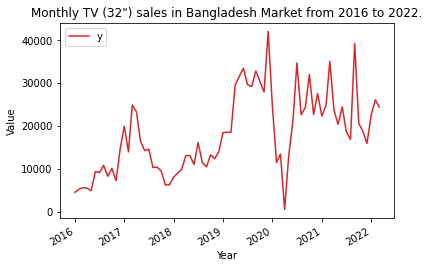

In [28]:
# plot the time series data
plt.figure(figsize=(30,25), dpi=100)
data.plot(x='ds', color='tab:red')
#plt.plot(x= data, y, color='tab:red')
plt.gca().set(title='Monthly TV (32") sales in Bangladesh Market from 2016 to 2022.', xlabel="Year", ylabel="Value")
plt.savefig(f"{images_dir}/Sale_org.png")
plt.show()



Ploting time series with datetime indexing


In [29]:
#. selecting delivery and time data from dataframe
data32_i= df32['Delivery']

In [30]:
data32_i.head()

Month
2016-01-01    4513
2016-02-01    5225
2016-03-01    5583
2016-04-01    5493
2016-05-01    4864
Name: Delivery, dtype: int64

In [31]:
type(data32_i)

pandas.core.series.Series

In [32]:
data32_i.dtypes

dtype('int64')

##ACF PCCF

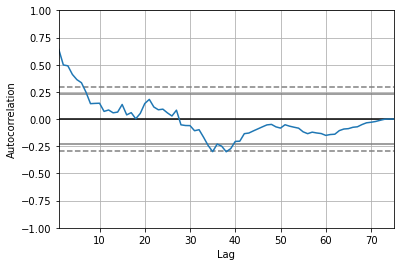

In [33]:
autocorrelation_plot(data['y'])
plt.show()

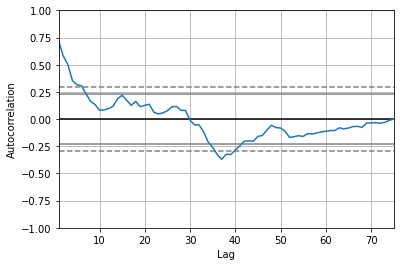

In [34]:
autocorrelation_plot(data32_i)
plt.savefig(f"{images_dir}/Autocorr.png")
plt.show()

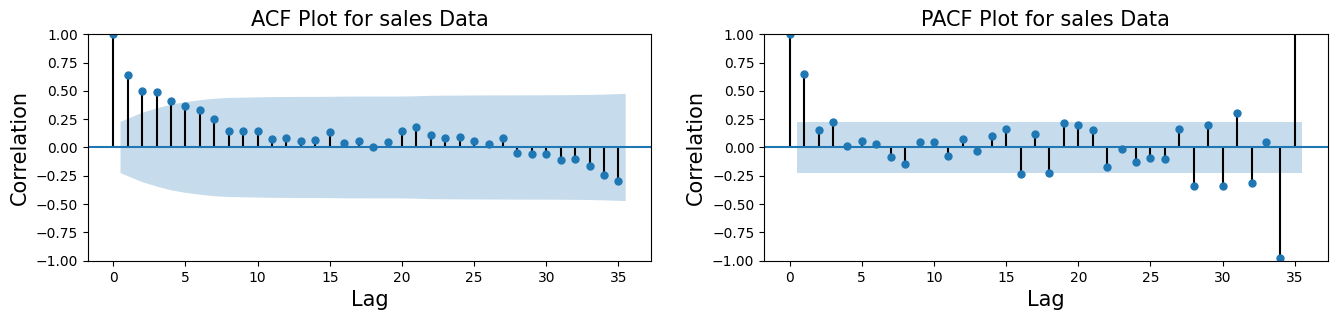

In [35]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig = plt.figure(figsize=(16,3), dpi= 100)
axes1 = fig.add_subplot(121)
plot_acf(data.y.tolist(), lags=35, ax=axes1)

plt.title("ACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)


axes2 = fig.add_subplot(122)
plot_pacf(data.y.tolist(),lags= 35,ax=axes2)
plt.title("PACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.show()

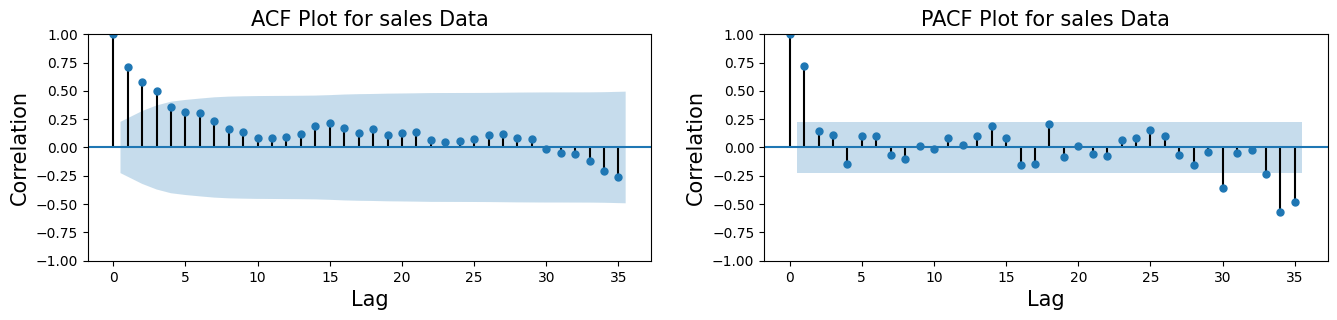

In [36]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig = plt.figure(figsize=(16,3), dpi= 100)
axes1 = fig.add_subplot(121)
plot_acf(data32_i.tolist(), lags=35, ax=axes1)

plt.title("ACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)


axes2 = fig.add_subplot(122)
plot_pacf(data32_i.tolist(), lags=35, ax=axes2)
plt.title("PACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.savefig("ACF-PACF.png")
plt.savefig(f"{images_dir}/ACF-PACF.png")
plt.show()


##Decomposition

In [37]:
data32_i.head()

Month
2016-01-01    4513
2016-02-01    5225
2016-03-01    5583
2016-04-01    5493
2016-05-01    4864
Name: Delivery, dtype: int64

In [38]:
data.head()

,ds,y
0,2022-01-01,22520
10,2022-02-01,26059
16,2022-03-01,24387
22,2021-01-01,22280
30,2021-02-01,24766


<Figure size 720x720 with 0 Axes>

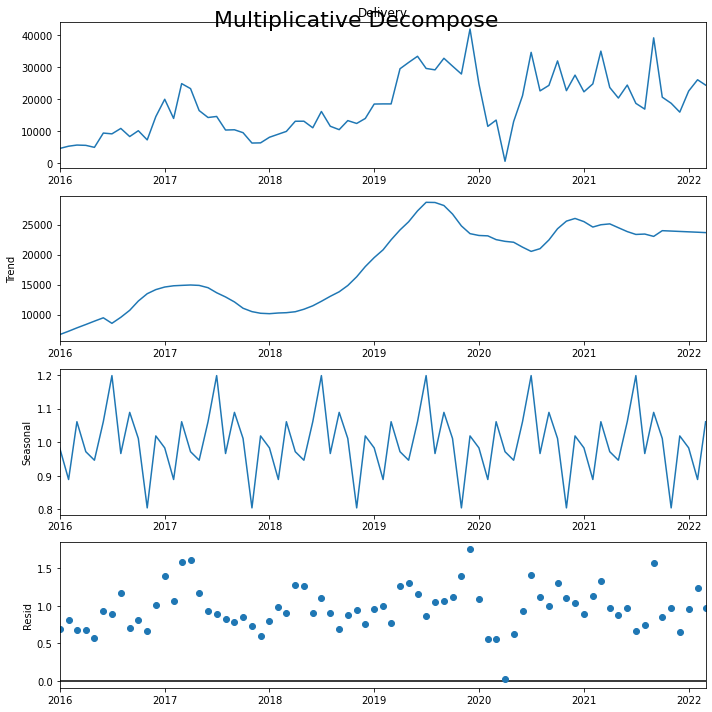

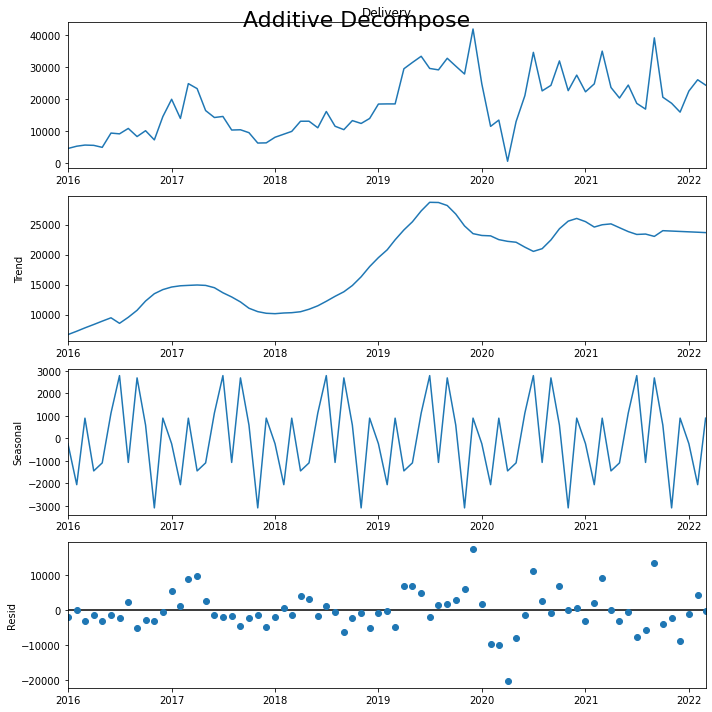

In [39]:
#Decomposition by STL
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data32_i, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(data32_i, model='additive', extrapolate_trend='freq')

# Plot

plt.rcParams.update({'figure.figsize': (10,10)})
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.savefig("MUl_d.png")
plt.savefig(f"{images_dir}/MUl_dcompose.png")
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.savefig("add_d.png")
plt.savefig(f"{images_dir}/add_dcompose.png")
plt.show()

##Seasonality test

The Canova-Hansen test for seasonal differences. Canova and Hansen (1995) proposed a test statistic for the null hypothesis that the seasonal pattern is stable. The test statistic can be formulated in terms of seasonal dummies or seasonal cycles. The former allows us to identify seasons (e.g. months or quarters) that are not stable, while the latter tests the stability of seasonal cycles (e.g. cycles of period 2 and 4 quarters in quarterly data). [1]

In [40]:
#https://alkaline-ml.com/pmdarima/index.html
#import pmdarima as pm
#pm.arima.CHTest(12)

STL decomposition

# ARIMA

## Make the data Stationary

Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

### Test for stationary






1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)



In [41]:
# sales quantity
tdf = data32_i
#using pmdarima package
arima.ADFTest(alpha=0.05, k=2).is_stationary(tdf)
arima.ADFTest(alpha=0.05, k=2).is_stationary(tdf)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  """


(0.14762375651245171, True)

In [42]:
 arima.KPSSTest(alpha=0.05).should_diff(tdf)


(0.01, True)

In [43]:
from statsmodels.tsa.stattools import adfuller, kpss
tdf = data32_i
# ADF Test
result = adfuller(tdf.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(tdf.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.5194575990026085
p-value: 0.007501219149836885
Critial Values:
   1%, -3.5219803175527606
Critial Values:
   5%, -2.9014701097664504
Critial Values:
   10%, -2.58807215485756

KPSS Statistic: 0.907327
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [44]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(tdf)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.519458
p-value: 0.007501


### Find the difference value (d)

In [45]:
from pmdarima.arima.utils import ndiffs, nsdiffs
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
tdf = data32_i

## Adf Test
print(ndiffs(tdf, test='adf'))  # 2

# KPSS test
print ( ndiffs(tdf, test='kpss'))  # 0

# PP test:
print(ndiffs(tdf, test='pp'))

1
1
0


In [46]:
#Seasonal deferencing check
 
## OCSBTest Test
print(nsdiffs(tdf,m=12, test='ocsb'))  # 2

# CHTest test
print ( nsdiffs(tdf, m=12, test='ch'))  # 0



0
0


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/seasonality.py:229: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frec = np.ones(int((s + 1) / 2), dtype=np.int)


### Take Difference

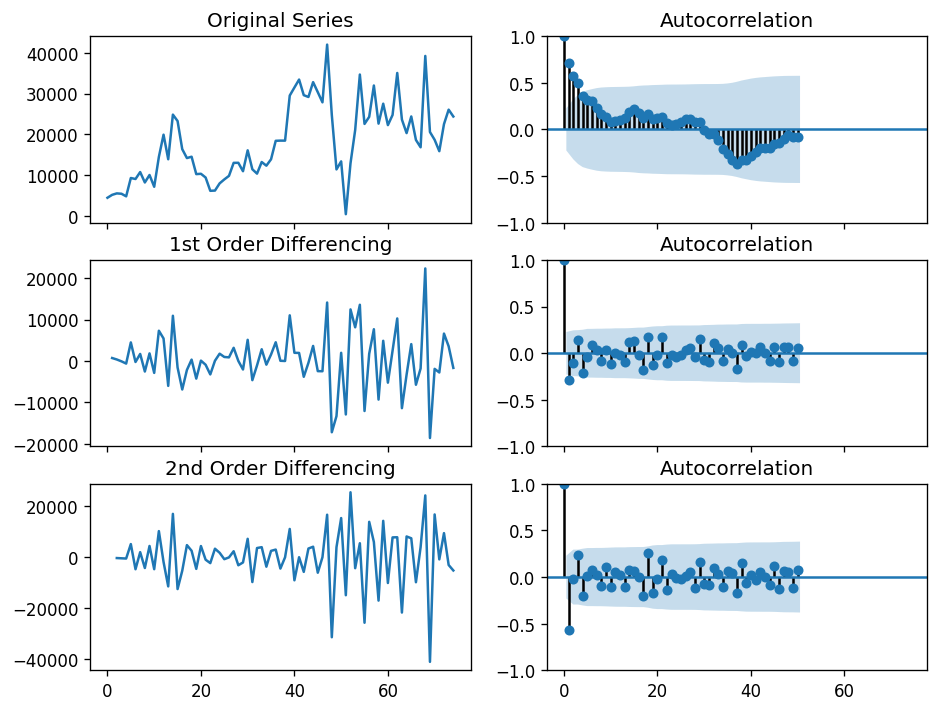

In [47]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(data32_i.values); axes[0, 0].set_title('Original Series')
plot_acf(data32_i.values,lags=50, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data32_i.diff().values) 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data32_i.diff().dropna().values,lags=50, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data32_i.diff().diff().values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data32_i.diff().diff().dropna().values,lags=50, ax=axes[2, 1])


plt.savefig("diferencing.png")
plt.savefig(f"{images_dir}/diferencing.png")

plt.show()

## Parameter Selection for SARIMA


In [48]:
p=q=d= range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)  for x in list(itertools.product(p,d,q))]

In [49]:
print('SARIMA: {} x {}'. format(pdq[1], seasonal_pdq[1]))

SARIMA: (0, 0, 1) x (0, 0, 1, 12)


In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data32_i,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2976384428916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1403.347419845935


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1345.4914241364766
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1081.5400708733557
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1368.6752995223974
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1339.3268548928306
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1098.3252125717554
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1083.0566945103585
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1615.0432655420518
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1347.0287712376473
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1299.5799602492154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1042.7122674040781
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1385.174423976082
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1341.4853052335343
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1082.255967745128
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1043.1436195923825
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1499.1665970761478
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1267.3833745340894
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1295.214342122895
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1037.032978537

## ARIMA model

ARIMA model with autoArima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1520.538, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1516.399, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1514.261, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1518.660, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1515.461, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1515.435, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1516.289, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1512.573, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1512.550, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1514.630, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1514.881, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1514.710, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1513.827, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1513.807, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]          

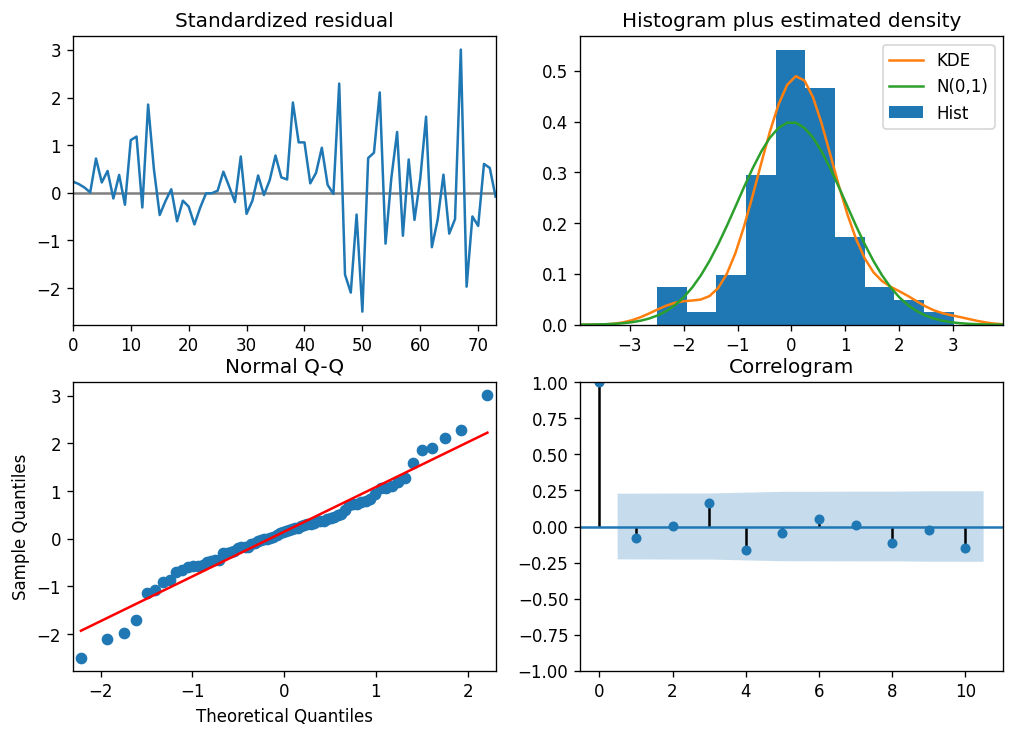

<Figure size 1080x840 with 0 Axes>

In [51]:
arima_model_order =  auto_arima(tdf,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, test='kpss', seasonal_test='ocsb', error_action='warn',
                          trace = True, supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order.plot_diagnostics(figsize=(10,7))
plt.show()
plt.savefig("ARIM-model.png")
plt.savefig(f"{images_dir}/ARIM-model.png")

In [52]:
auto_arima(data32_i, seasonal=True, m=12,max_p=7, max_d=3,max_q=5, max_P=7, max_D=3,max_Q=4).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -753.275
Date:                Sun, 17 Apr 2022   AIC                           1512.550
Time:                        17:05:07   BIC                           1519.462
Sample:                             0   HQIC                          1515.307
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5447      0.129      4.211      0.000       0.291       0.798
ma.L1         -0.8769      0.077    -11.352      0.000      -1.028      -0.725
sigma2      4.466e+07   5.83e-11   7.66e+17      0.000    4.47e+07    4.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 5.47
Prob(Q):                              0.50   Prob(JB):                         0.07
Heteroskedasticity (H):               4.16   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.56e+34. Standard errors may be unstable.
"""

## Model build up

In [53]:
#Split into test and train data
train_data, test_data = train_test_split(tdf, test_size=0.10, shuffle = False)

print(train_data)


Month
2016-01-01     4513
2016-02-01     5225
2016-03-01     5583
2016-04-01     5493
2016-05-01     4864
              ...  
2021-03-01    35036
2021-04-01    23637
2021-05-01    20327
2021-06-01    24397
2021-07-01    18657
Name: Delivery, Length: 67, dtype: int64


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                               SARIMAX Results                                
Dep. Variable:               Delivery   No. Observations:                   67
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -666.876
Date:                Sun, 17 Apr 2022   AIC                           1339.753
Time:                        17:05:08   BIC                           1346.322
Sample:                    01-01-2016   HQIC                          1342.348
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6628      0.122      5.429      0.000       0.424       0.902
ma.L1         -0.9018      0.067    -13.392      0.000      -1.034      -0.770
sigma2       3.48e+07   6.86e-10   5.07e+16      0.0

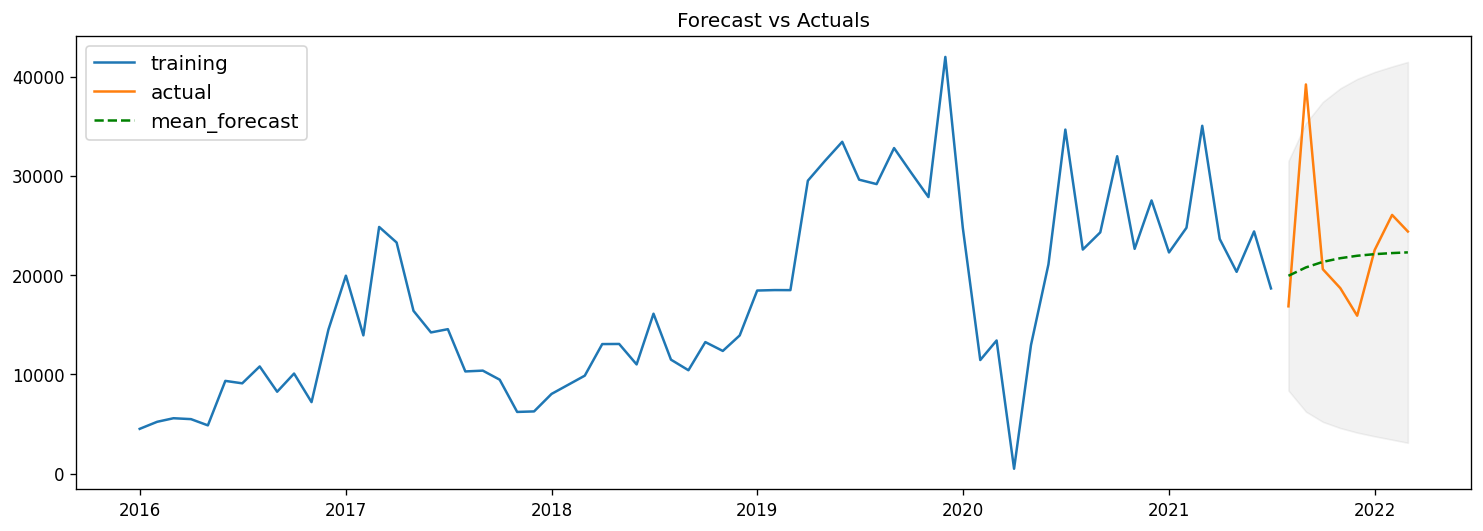

In [54]:
# Build Model
timestamp = time.time()
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train_data, order= arima_model_order.order)  
fitted = model.fit()  

print(fitted.summary())
fcast = fitted.get_forecast(len(test_data), alpha=0.05).summary_frame()
#pfcast = fitted.forecast(12, alpha=0.05)
#Afcast = fitted.get_forecast(train_data, alpha=0.05).summary_frame()
# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fcast['mean'],'g--', label='mean_forecast')
#plt.plot(pfcast, 'bo',label='forecast')
#train_data.plot(  ax=ax)
#test_data.plot( ax=ax)
#fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_ARIMA.png')
plt.savefig(f"{images_dir}/Forecast_ARIMA.png")

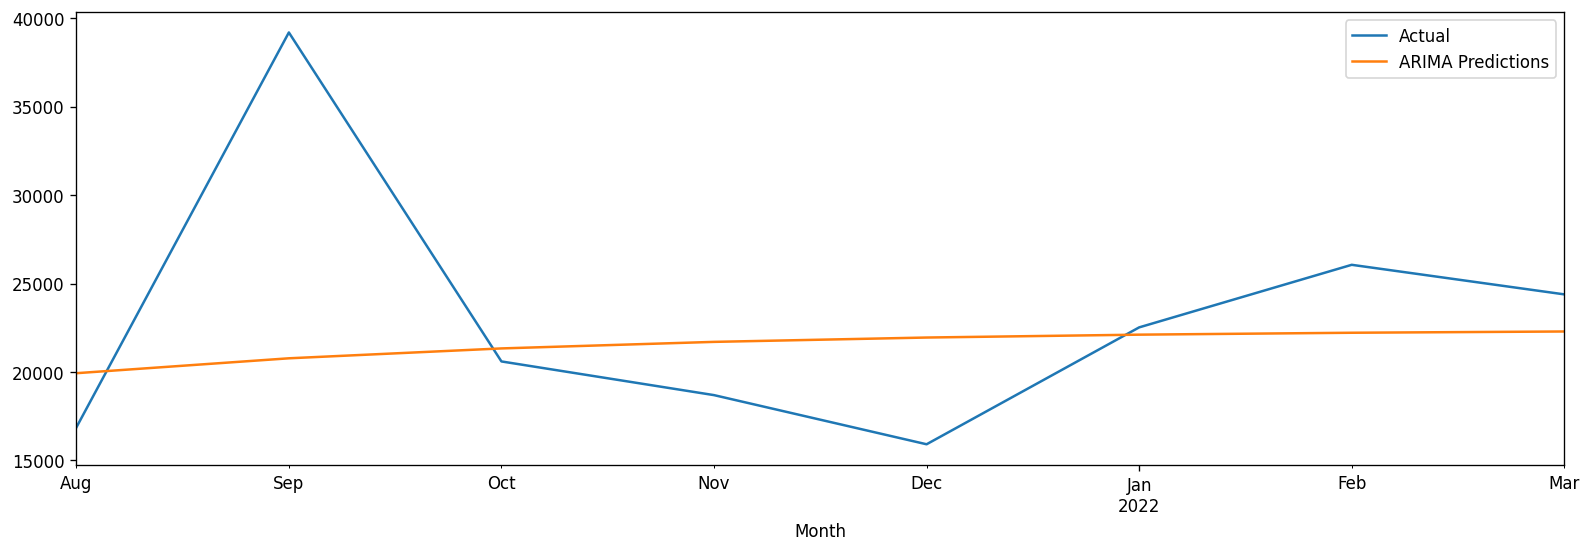

In [55]:
arima_pred = fitted.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("ARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
arima_pred.plot(legend= True)
plt.savefig('Forecast_train.png')
plt.savefig(f"{images_dir}/Forecast_train.png")

### Error Calculation

In [56]:
def calculate_error_measures(X, Y):
    
    """
    Function to calculate the mean squared error, mean absolute error and the coefficient of determination (r2) between two lists.
    ...
    Attributes
    ----------
    X : list
    
    Y : list
    
    """
    
        
    MSE = mean_squared_error(X, Y)
    print('Mean Squared Error(MSE): ', MSE)
    
    MAE = mean_absolute_error(X, Y)
    print('Mean Absolute Error(MAE): ', MAE)
    RMSE =mean_squared_error(X, Y,squared=False)
    print('Root Mean Squared Error(RMSE):', RMSE )
    #squared bool, default=True If True returns MSE value, if False returns RMSE value.
    error_measures = [MSE, MAE,RMSE]
    return error_measures

In [57]:
print("Error measures for ARIMA:")
from sklearn.metrics import mean_squared_error, mean_absolute_error
calculate_error_measures(test_data, fcast['mean'])


Error measures for ARIMA:
Mean Squared Error(MSE):  51806906.35968447
Mean Absolute Error(MAE):  4704.949142831061
Root Mean Squared Error(RMSE): 7197.701463639935


[51806906.35968447, 4704.949142831061, 7197.701463639935]

Plotting over test data

In [58]:
# RSE and MSE using stats model
arima_rmse_error = rmse(test_data, arima_pred)
arima_mse_error = mse(test_data, arima_pred)
print (arima_rmse_error )
print (arima_mse_error )

7197.701463639935
51806906.35968447


In [59]:
calculate_error_measures(test_data, arima_pred)

Mean Squared Error(MSE):  51806906.35968447
Mean Absolute Error(MAE):  4704.949142831061
Root Mean Squared Error(RMSE): 7197.701463639935


[51806906.35968447, 4704.949142831061, 7197.701463639935]

In [61]:
# new model stepwise_ARIMA

In [62]:
def stepwise_ARIMA(train_data, test_data, optimal_order):
    
    """
    Function to perform stepwise ARIMA forecasting.
    ...
    Attributes
    ----------
    train_data : list
    
    test_data : list
    
    optimal_order : tuple
        Optimal order of the ARIMA model, determined by the auto_arima function in the pmdarima library.
   
    """
    
    history = [x for x in train_data]
    model_predictions = []
    N_test_observations = len(test_data)
    for time_point in range(N_test_observations):
        model = ARIMA(history, order=optimal_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = test_data[time_point]
        history.append(true_test_value)
    return model_predictions

In [63]:
model_predictions = stepwise_ARIMA(train_data,test_data, arima_model_order.order)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


In [64]:
calculate_error_measures(test_data, model_predictions)

Mean Squared Error(MSE):  88114111.5996624
Mean Absolute Error(MAE):  6775.558901103952
Root Mean Squared Error(RMSE): 9386.91171790075


[88114111.5996624, 6775.558901103952, 9386.91171790075]

In [65]:
model_predictions

[19928.544874500396,
 18385.466322146694,
 34726.30366325645,
 22062.17092804888,
 20562.02385494893,
 18402.10490199498,
 22563.767226962766,
 24931.76633918141]

In [66]:
test_data

Month
2021-08-01    16855
2021-09-01    39200
2021-10-01    20594
2021-11-01    18689
2021-12-01    15909
2022-01-01    22520
2022-02-01    26059
2022-03-01    24387
Name: Delivery, dtype: int64

## Model with Seasonality

In [67]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(tdf, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1315.886, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1302.225, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1297.345, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1314.798, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1298.458, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1298.332, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1301.731, Time=0.48 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1300.933, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1300.651, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -645.673
Date:                            Sun, 17 Apr 2022   AIC                           1297.345
Time:                                    17:06:02   BIC                           1303.727
Sample:                                         0   HQIC                          1299.851
                                             - 75                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3153      0.162     -1.941      0.052      -0.634       0.003
ma.S.L12      -0.7332      0.288     -2.548      0.011      -1.297      -0.169
sigma2      9.253e+07   1.81e-09    5.1e+16      0.000    9.25e+07    9.25e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.75   Prob(JB):                         0.33
Heteroskedasticity (H):               5.55   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+32. Standard errors may be unstable.
"""

Model  with PM library 

In [92]:
type(train_data)

pandas.core.series.Series

In [93]:
# Fit an ARIMA

pmarima = pm.auto_arima(train_data, seasonal=True, m=12)
pmmodel = pmarima.fit(train_data)
pmpred = pmmodel.fit_predict(test_data)
pmmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -73.410
Date:                Sun, 17 Apr 2022   AIC                            154.821
Time:                        17:49:08   BIC                            154.605
Sample:                             0   HQIC                           152.147
                                  - 8                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0353      1.155      0.031      0.976      -2.229       2.300
ar.L2         -0.6951      0.310     -2.245      0.025      -1.302      -0.088
ma.L1         -1.0000      0.687     -1.455      0.146      -2.347       0.347
sigma2      4.889e+07   1.41e-08   3.48e+15      0.000    4.89e+07    4.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.13   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.14   Prob(JB):                         0.79
Heteroskedasticity (H):               0.12   Skew:                             0.31
Prob(H) (two-sided):                  0.22   Kurtosis:                         1.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.88e+32. Standard errors may be unstable.
"""

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                                     SARIMAX Results                                      
Dep. Variable:                           Delivery   No. Observations:                   67
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -414.188
Date:                            Sun, 17 Apr 2022   AIC                            836.376
Time:                                    17:28:59   BIC                            843.131
Sample:                                01-01-2016   HQIC                           838.818
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -2.6915     12.258     -0.220      0.826     -26.716      21.333
ma.L1         -0.2205      0.175   

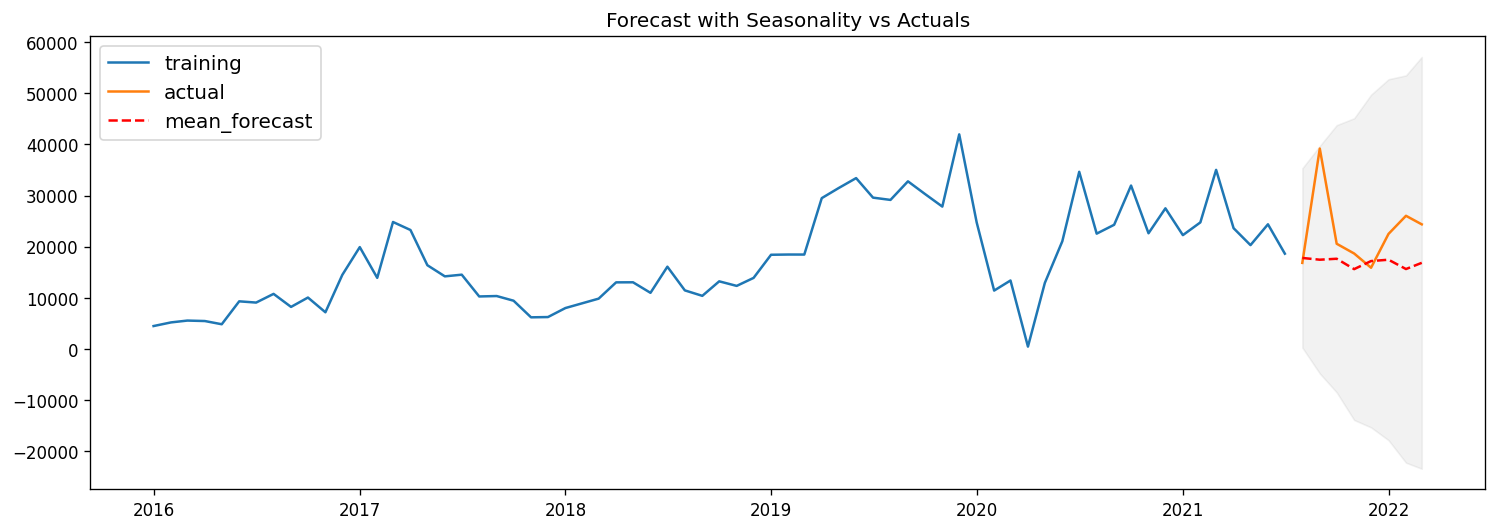

In [86]:

Fmodel=SARIMAX(train_data,order=(0, 1, 1),seasonal_order=(0,1,1,12),trend='t',enforce_stationarity=False,
                                            enforce_invertibility=False)
Sarimares=Fmodel.fit()

print(Sarimares.summary())
fscast = Sarimares.get_forecast(len(test_data), alpha=0.05).summary_frame()
#pfcast = fitted.forecast(12, alpha=0.05)
#Afcast = fitted.get_forecast(train_data, alpha=0.05).summary_frame()
# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fscast['mean'],'r--', label='mean_forecast')
#plt.plot(pfcast, 'bo',label='forecast')
#train_data.plot(  ax=ax)
#test_data.plot( ax=ax)
#fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fscast.index, fscast['mean_ci_lower'], fscast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast with Seasonality vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_SARIMA.png')
plt.savefig(f"{images_dir}/Forecast_SARIMA.png")

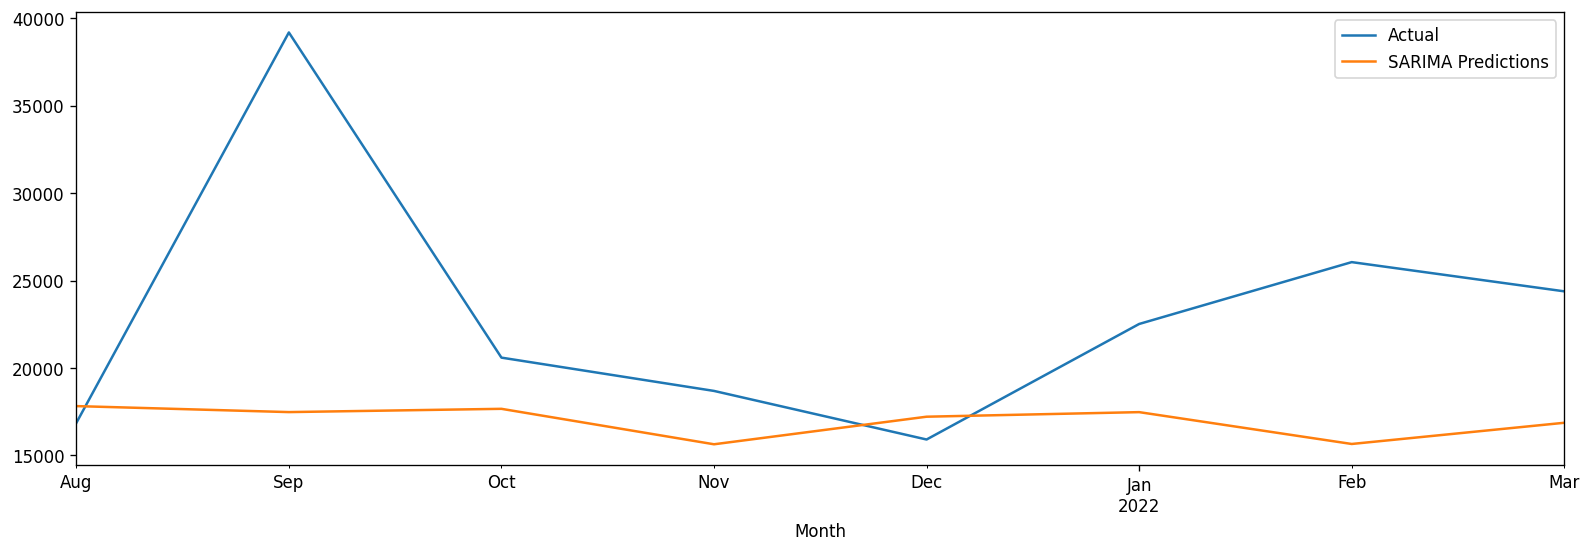

In [81]:
Sarima_pred = Sarimares.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("SARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
Sarima_pred.plot(legend= True)
plt.savefig('Forecast_train_with_Seasonal.png')
plt.savefig(f"{images_dir}/Forecast_train_with_Seasonal.png")

In [83]:
print(Sarimares.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -2.6915     12.258     -0.220      0.826     -26.716      21.333
ma.L1         -0.2205      0.175     -1.257      0.209      -0.564       0.123
ma.S.L12      -0.9218      0.323     -2.857      0.004      -1.554      -0.289
sigma2      7.906e+07   2.44e-07   3.24e+14      0.000    7.91e+07    7.91e+07


In [84]:
calculate_error_measures(test_data, Sarima_pred)

Mean Squared Error(MSE):  85334485.4061726
Mean Absolute Error(MAE):  6618.149645641533
Root Mean Squared Error(RMSE): 9237.666664595157


[85334485.4061726, 6618.149645641533, 9237.666664595157]

In [85]:
calculate_error_measures(test_data, arima_pred)

Mean Squared Error(MSE):  51806906.35968447
Mean Absolute Error(MAE):  4704.949142831061
Root Mean Squared Error(RMSE): 7197.701463639935


[51806906.35968447, 4704.949142831061, 7197.701463639935]

In [75]:
#(1, 0, 1)x(0, 1, 1, 12)12

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                               SARIMAX Results                                
Dep. Variable:               Delivery   No. Observations:                   67
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -664.251
Date:                Sun, 17 Apr 2022   AIC                           1336.503
Time:                        18:00:28   BIC                           1345.262
Sample:                    01-01-2016   HQIC                          1339.964
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0919      0.103    -10.580      0.000      -1.294      -0.890
ar.L2         -0.3404      0.112     -3.050      0.002      -0.559      -0.122
ma.L1          0.9679      0.106      9.160      0.0

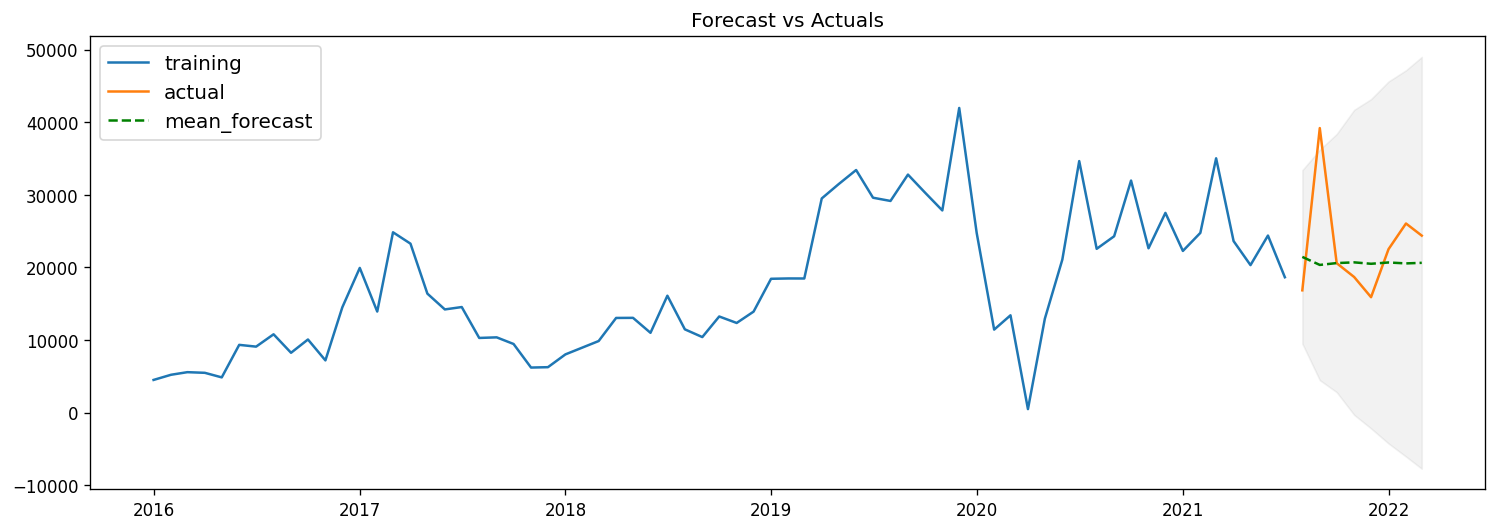

In [103]:
# Build Model
timestamp = time.time()
# model = ARIMA(train, order=(3,2,1))  
pmodel = ARIMA(train_data, order= (2,1,1))  
pfitted = pmodel.fit()  

print(pfitted.summary())
fpcast = pfitted.get_forecast(len(test_data), alpha=0.05).summary_frame()
#pfcast = fitted.forecast(12, alpha=0.05)
#Afcast = fitted.get_forecast(train_data, alpha=0.05).summary_frame()
# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fpcast['mean'],'g--', label='mean_forecast')
#plt.plot(pfcast, 'bo',label='forecast')
#train_data.plot(  ax=ax)
#test_data.plot( ax=ax)
#fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fpcast.index, fpcast['mean_ci_lower'], fpcast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_ARIMA(211).png')
plt.savefig(f"{images_dir}/Forecast_ARIMA(211).png")

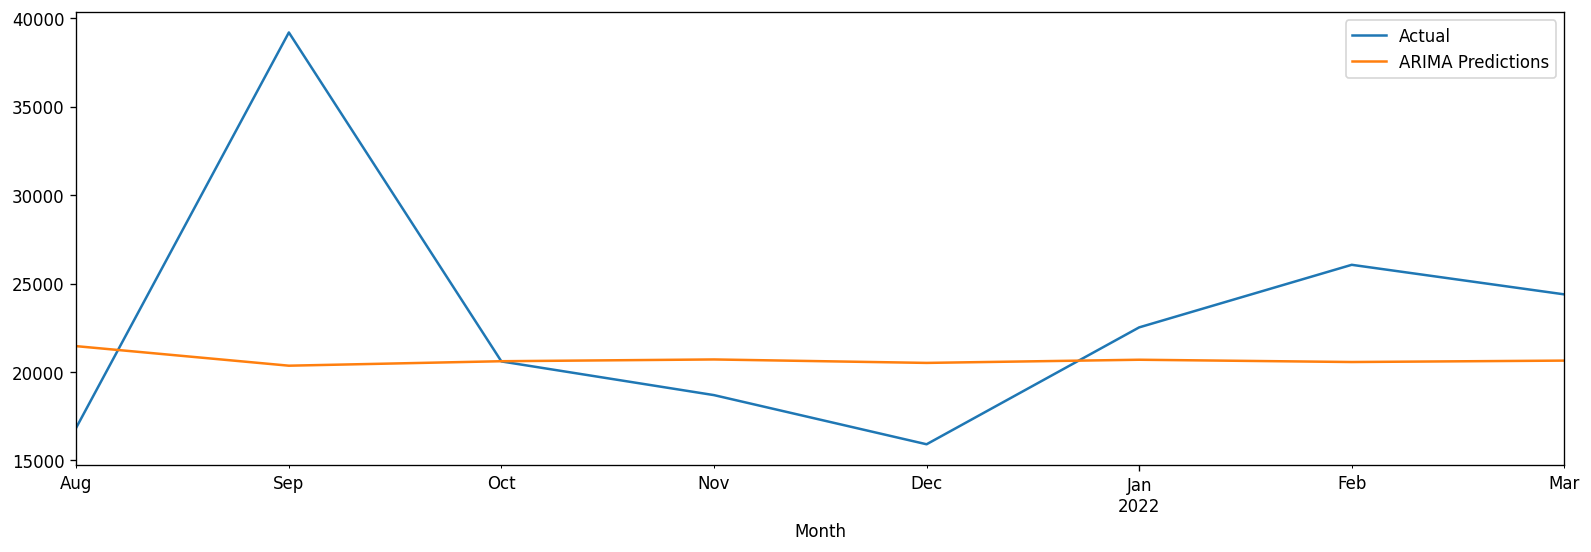

In [105]:
p_pred = pfitted.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("ARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
p_pred.plot(legend= True)
plt.savefig('Forecast_train_with_211.png')
plt.savefig(f"{images_dir}/Forecast_train_with_211.png")

In [106]:
calculate_error_measures(test_data, p_pred)

Mean Squared Error(MSE):  56155009.625489965
Mean Absolute Error(MAE):  5144.410981027533
Root Mean Squared Error(RMSE): 7493.664632573969


[56155009.625489965, 5144.410981027533, 7493.664632573969]